## 遺伝的アルゴリズム
### この関数作って
#### 初期値生成
#### 評価
#### 選択
#### 突然変異

とその前に。。。。
## リアルタイム可視化の方法

[このサイトのコードを引用](https://www.sejuku.net/blog/61007)

どうやら %matplotlib notebook と　%matplotlib inline  この二つは実行環境によって動作が異なるらしい。<br>

## %matplotlib inlineの場合
○：JupyterLab<br>
○：Jupyter Notebook

## %matplotlib notebookの場合
×：JupyterLab（→「Javascript Error: IPython is not defined」と表示される。）<br>
○：Jupyter Notebook

引用
[【備忘録】JupyterLabとJupyter Notebookにおける%matplotlib inlineと%matplotlib notebookの挙動の違い（Javascript Error: IPython is not defined）](https://tropicbird.hatenablog.com/entry/2019/08/28/110119)

そういえばjupyterlabとjupyter notebookについてあんま調べなかったからついでに
jupyterlabはjupyter notebookの進化系みたいなやつで、notebookの方は一画面表示しかできなかったのに対し、複数の画面を表示できるようにしたのがlabっていう感じかな？<br>
調べている途中に面白そうなツールなどを発見したのでインストール<br>
Node.jsのインストールが必要だったのでついでにインストール<br>
[参考資料](https://qiita.com/kyosuke5_20/items/c5f68fc9d89b84c0df09)<br>
[役立つやつ](https://qiita.com/kirikei/items/a1639954ce5ccaf7ac3c)<br>

ということで本題に...
ちなみに、サイトのやつそのままだとどうやらうまくいかないようで、調べたらそのままコピペした人のteratailの質問があったので、その回答のコードを参考（丸写し）しました。<br>
[python におけるアニメーション](https://teratail.com/questions/223929)

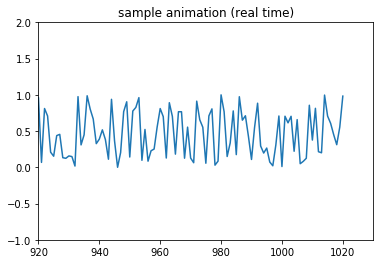

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
import random
from IPython.display import HTML
import copy

fig = plt.figure()
xlim = [0, 110]
X, Y = [], []
def plot(data):
    plt.cla()  # 前のグラフを削除
    for i in range(10):
        Y.append(random.random())  # データを作成
        X.append(len(Y))
        # # 描画範囲を更新
        if len(X) > 100: 
            xlim[0] += 1
            xlim[1] += 1
    plt.plot(X, Y)  # 次のグラフを作成
    plt.title("sample animation (real time)")
    plt.ylim(-1, 2)
    plt.xlim(xlim[0], xlim[1])
# 10msごとにplot関数を呼び出してアニメーションを作成
ani = animation.FuncAnimation(fig, plot, interval=100,)
HTML(ani.to_jshtml())

完了。ということで早速関数作り

# 初期値生成

In [174]:
import numpy as np

def create_citys(num_of_citys):
    citys = np.zeros((num_of_citys, 2))
    for x in range(num_of_citys):
        citys[x,0] = random.random()
        citys[x,1] = random.random()
    return citys



In [175]:
citys_info=create_citys(10)

In [176]:
citys_info

array([[0.3241385 , 0.9203858 ],
       [0.31252594, 0.72228096],
       [0.17886475, 0.49625489],
       [0.90979148, 0.52381308],
       [0.09862271, 0.38499685],
       [0.44008119, 0.93436126],
       [0.26654594, 0.70861774],
       [0.56381173, 0.98959585],
       [0.63563099, 0.21518419],
       [0.8779761 , 0.72435222]])

# 初期遺伝子情報作成

In [177]:

def create_gene(data, num_of_gene):
    gene = np.zeros((num_of_gene,data.shape[0]))
    gene_sample = np.array(list(range(10)))
    for y in range(gene.shape[0]):
        gene[y] = np.random.permutation(gene_sample)
    return gene

In [178]:
gene = create_gene(citys_info, 50)

In [179]:
gene

array([[0., 1., 4., 7., 5., 2., 9., 6., 8., 3.],
       [1., 6., 5., 9., 4., 3., 0., 7., 8., 2.],
       [2., 4., 8., 1., 7., 9., 6., 5., 3., 0.],
       [8., 4., 9., 7., 3., 1., 2., 5., 6., 0.],
       [5., 1., 9., 2., 8., 6., 7., 3., 0., 4.],
       [0., 6., 4., 9., 5., 1., 3., 7., 8., 2.],
       [2., 9., 4., 6., 3., 8., 5., 1., 7., 0.],
       [1., 5., 6., 2., 8., 3., 0., 9., 4., 7.],
       [2., 8., 6., 5., 4., 7., 9., 1., 3., 0.],
       [1., 2., 3., 0., 5., 7., 8., 9., 4., 6.],
       [1., 3., 0., 9., 6., 8., 7., 5., 4., 2.],
       [0., 8., 4., 9., 7., 6., 1., 3., 5., 2.],
       [5., 7., 6., 9., 1., 4., 8., 3., 0., 2.],
       [9., 4., 1., 6., 8., 5., 2., 3., 0., 7.],
       [1., 7., 2., 5., 0., 3., 6., 9., 4., 8.],
       [4., 2., 6., 8., 3., 9., 5., 0., 7., 1.],
       [1., 3., 6., 0., 4., 8., 2., 9., 5., 7.],
       [1., 3., 9., 5., 8., 0., 6., 2., 4., 7.],
       [6., 1., 7., 4., 9., 0., 5., 2., 8., 3.],
       [1., 5., 7., 0., 8., 4., 9., 2., 3., 6.],
       [8., 5., 7., 

# 評価

In [180]:

def culc_dist(city_info, gene):
    dist = np.zeros(gene.shape[0])
    for x in range(gene.shape[0]):
        dist_contain = 0
        for y in range(gene.shape[1]-1):
            dist_contain += np.linalg.norm(city_info[int(gene[x, y])] - city_info[int(gene[x, y+1])])
        dist[x] = dist_contain
    return dist

In [181]:
dist_list = culc_dist(citys_info,gene)# それぞれの遺伝子の距離を格納

In [182]:
dist_list

array([4.38228441, 4.76215369, 4.3072206 , 4.31086283, 4.9783337 ,
       4.69086872, 4.6412074 , 4.61878366, 5.1602191 , 4.50986715,
       4.84925048, 4.81564036, 4.25266492, 4.85715142, 5.0209266 ,
       2.8177665 , 4.55511495, 4.18353324, 4.19122141, 4.95272486,
       4.62062984, 4.08762719, 4.37937184, 5.08343149, 4.34336104,
       4.70307499, 5.00135464, 4.76867817, 4.43656904, 4.50656001,
       4.44977295, 4.02336287, 3.31004254, 4.24079947, 3.63730279,
       4.72256502, 3.97943228, 4.75621228, 3.97841093, 4.48758993,
       4.48867305, 3.97596593, 5.09003647, 4.8176141 , 4.93973581,
       4.54257213, 4.56471295, 4.85248662, 4.71720197, 3.01391154])

# 選択　エリート、ルーレット

# エリート

エリートとエリートじゃないやつを分ける。

In [183]:

def eliminate_badguys(dist_list,gene):
    dist_rank = dist_list.argsort()
    num_of_elite = dist_rank.shape[0]//2
    elite_dist = dist_rank[:num_of_elite]
    not_elite_dist = dist_rank[num_of_elite:]
    return elite_dist , not_elite_dist

    
    

In [184]:
elite, not_elite = eliminate_badguys(dist_list,gene)# エリートとそうじゃないやつのインデックスを格納
elite

array([15, 49, 32, 34, 41, 38, 36, 31, 21, 17, 18, 33, 12,  2,  3, 24, 22,
        0, 28, 30, 39, 40, 29,  9, 45])

# ルーレット

In [185]:

def choice(dist_list, not_elite_index):
    new_dist_list = np.array([dist_list[x] for x in not_elite_index])
    def create_plob(new_dist_list):
        re_dist_list = 1/new_dist_list
        sum = np.sum(re_dist_list)
        plob = np.zeros(len(dist_list.shape))
        plob = re_dist_list/sum
        return plob


    roulette = create_plob(new_dist_list)
    choiced = np.random.choice(not_elite_index, 2,replace = False, p = roulette)
    return choiced



In [186]:
choice(dist_list, not_elite)

array([ 8, 16])

# 交叉

In [187]:

def cross_over(gene, crosslist, double = False):
    gene = copy.deepcopy(gene)#参照私ではなく、値私しないと、破壊的になる。
    parent1 = gene[crosslist[0]]
    parent2 = gene[crosslist[1]]
    slit_first = random.randint(0, parent1.shape[0]-1)
    if double == True:
        slit_last = random.randint(slit_first, parent1.shape[0]-1)
    else:
        slit_last = parent1.shape[0]
    for x in range(slit_first, slit_last):
        find_data2 = parent1[x]
        find_data1 = parent2[x]
        index_palet=np.array(range(10))
        index2 = index_palet[np.where(parent2 == find_data2, True, False)]
        index1 = index_palet[np.where(parent1 == find_data1, True, False)]
        parent1[[x, index1[0]]] = parent1[[index1[0], x]]
        parent2[[x, index2[0]]] = parent2[[index2[0], x]]
    gene[crosslist[0]] = parent1
    gene[crosslist[1]] = parent2
    return gene

In [188]:
a = cross_over(gene, choice(dist_list,not_elite))

In [189]:
a == gene

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True, False,  True, False, False,  True, False, False,
        False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True, 

In [190]:
gene

array([[0., 1., 4., 7., 5., 2., 9., 6., 8., 3.],
       [1., 6., 5., 9., 4., 3., 0., 7., 8., 2.],
       [2., 4., 8., 1., 7., 9., 6., 5., 3., 0.],
       [8., 4., 9., 7., 3., 1., 2., 5., 6., 0.],
       [5., 1., 9., 2., 8., 6., 7., 3., 0., 4.],
       [0., 6., 4., 9., 5., 1., 3., 7., 8., 2.],
       [2., 9., 4., 6., 3., 8., 5., 1., 7., 0.],
       [1., 5., 6., 2., 8., 3., 0., 9., 4., 7.],
       [2., 8., 6., 5., 4., 7., 9., 1., 3., 0.],
       [1., 2., 3., 0., 5., 7., 8., 9., 4., 6.],
       [1., 3., 0., 9., 6., 8., 7., 5., 4., 2.],
       [0., 8., 4., 9., 7., 6., 1., 3., 5., 2.],
       [5., 7., 6., 9., 1., 4., 8., 3., 0., 2.],
       [9., 4., 1., 6., 8., 5., 2., 3., 0., 7.],
       [1., 7., 2., 5., 0., 3., 6., 9., 4., 8.],
       [4., 2., 6., 8., 3., 9., 5., 0., 7., 1.],
       [1., 3., 6., 0., 4., 8., 2., 9., 5., 7.],
       [1., 3., 9., 5., 8., 0., 6., 2., 4., 7.],
       [6., 1., 7., 4., 9., 0., 5., 2., 8., 3.],
       [1., 5., 7., 0., 8., 4., 9., 2., 3., 6.],
       [8., 5., 7., 

# 突然変異

In [191]:

def select_mutation(gene, not_elite):
    def mutation(gene):
        one_gene = copy.deepcopy(gene)
        first_ind = random.randint(0, one_gene.shape[0]-1)
        second_ind = random.randint(first_ind, one_gene.shape[0]-1)
        one_gene[[first_ind, second_ind]] = one_gene[[second_ind, first_ind]]
        return one_gene
    for x in not_elite:
        #i = random.randint(1, 100)
        #if i <= 100:
        gene[x] = mutation(gene[x])
    return gene

In [192]:
b = select_mutation(a, not_elite)

In [193]:
not_elite

array([16, 46,  7, 20,  6,  5, 25, 48, 35, 37,  1, 27, 11, 43, 10, 47, 13,
       44, 19,  4, 26, 14, 23, 42,  8])

In [194]:
a == b

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True, 